<a href="https://colab.research.google.com/github/Therezaclm/Estatistica-com-python/blob/main/Modelos_Regressivos_Womakerscode_TechMinas_Squad_Carmen_Portinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green>**BootCamp TECH MINAs 2023**</font>



# <font color=green>Challenge Modelos Regressivos</font>

## <font color=blue>Desafio: Estimando o Preço do Imóvel</font>

Suponha que você trabalha em uma empresa do setor imobiliário. Após explorar as principais variáveis que impactam o preco dos imóveis,na semana passada, pediram para você, do time de dados, construir um modelo que estime o preço de um imóvel. Para isso, você utilizará a mesma base de dados da semana anterior (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los? A base contém as seguintes informações,

● id : código identificador do imóvel

● date: data em que o imóvel foi cadastrado

● price: preço do imóvel

● bedrooms: número de quartos

● bathrooms: número de banheiros

● sqft_living: tamanho do imóvel (dentro da casa)

● sqft_lot: tamanho do lote / terreno

● floors: andares

● waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso contrário.

● view: indica o número de quartos com vista.

● condition: condição do imóvel, escala de 1 a 5

● grade: nota do imóvel

● sqft_above: tamanho da casa acima do solo (excluindo porão)

● sqft_basement: tamanho do porão

● yr_built: ano em que a casa foi construída

● yr_renovated: ano em que a casa foi renovada

● zipcode: "CEP" do imóvel

● lat: latitude do imóvel

● long: longitude do imóvel

1 - Selecione as principais variáveis que você gostaria de incluir no modelo de precificação do imóvel.

2 - Construa um modelo de regressão linear multivariada para estimar o preço do imóvel. Lembre-se de: Analisar a tabela de regressão e os resíduos do modelo e interprete os resultados

3 - Suponha agora que você encontrou um modelo ideal. Explique como você faria para colocar esse modelo em produção? Entenda por modelo em produção um modelo que a cada apartamento novo inserido na base precifique-o com base no seu modelo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib




dados = pd.read_csv("imoveis.csv")
dados.head()
dados.shape

(21613, 19)

In [ ]:
dados.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [ ]:
#Selecionando as variáveis

list_columns = ['bedrooms','sqft_living','condition','yr_built','bathrooms','grade','floors']
X = dados.loc[:,list_columns].values
y = dados.loc[:,"price"].values

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


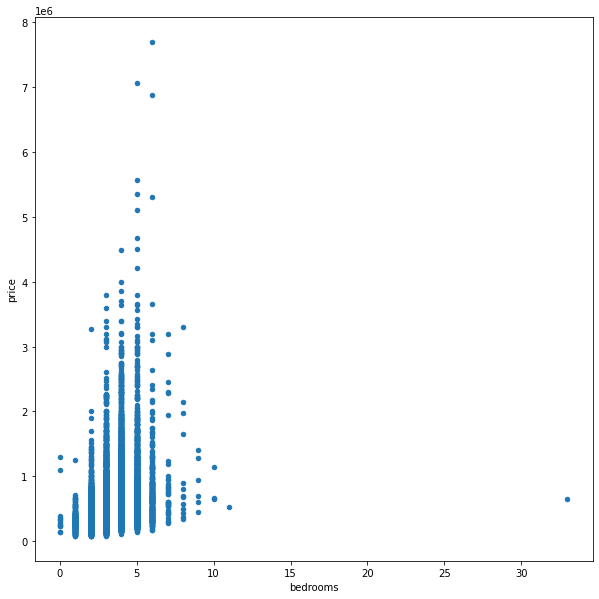

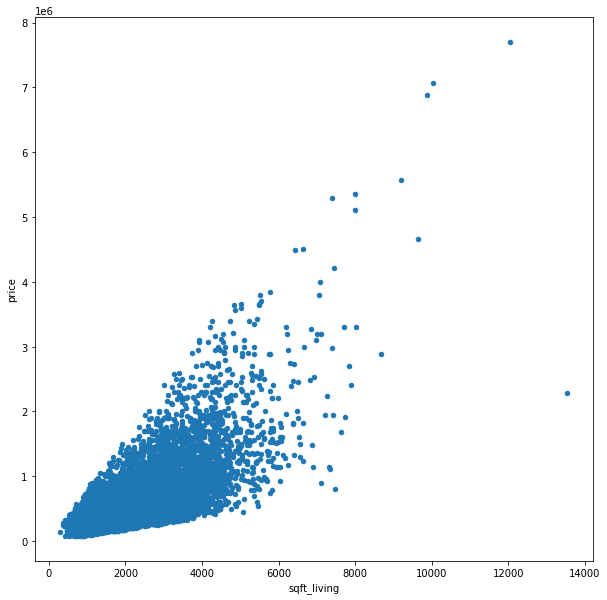

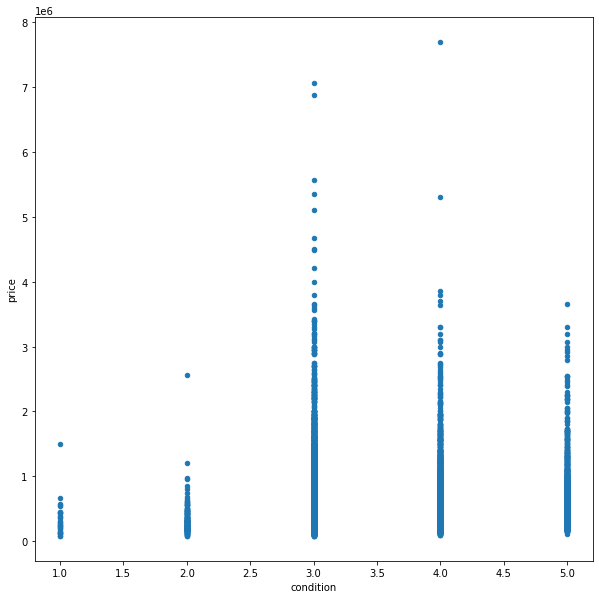

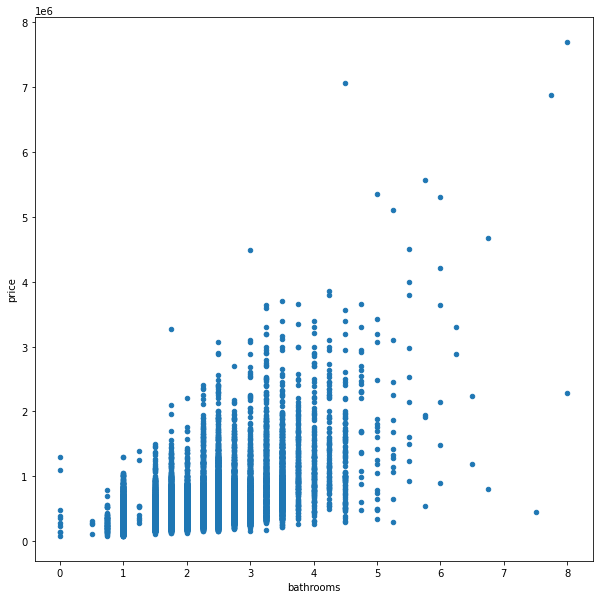

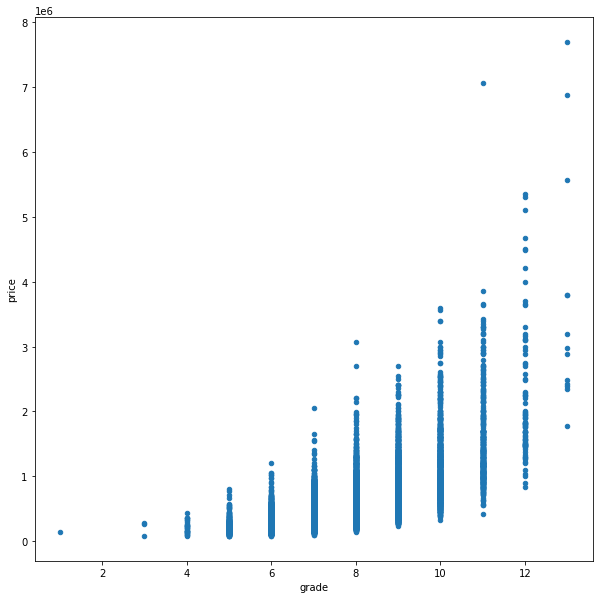

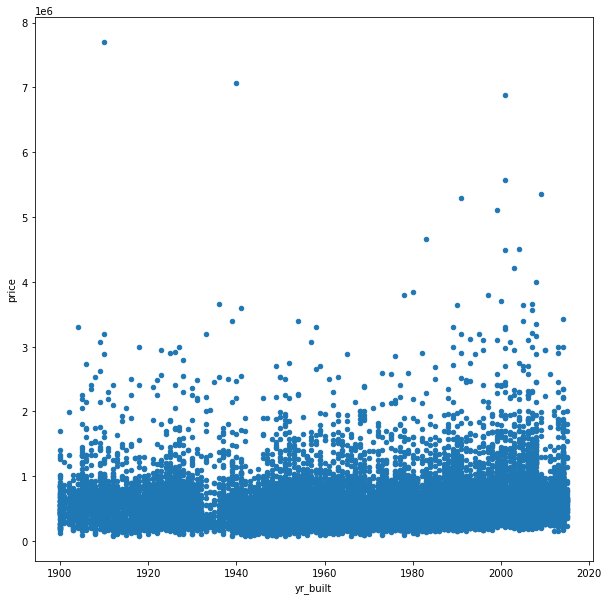

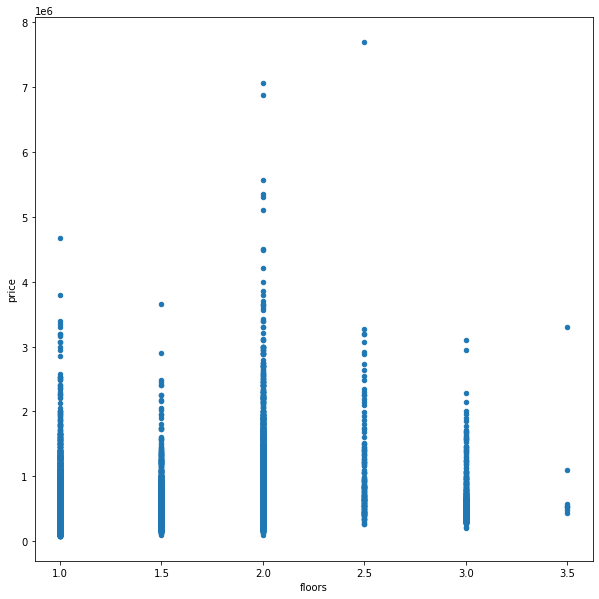

In [ ]:
dados.plot(x='bedrooms', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='sqft_living', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='condition', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='bathrooms', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='grade', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='yr_built', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='floors', y='price',
        kind="scatter", figsize=(10, 10))


plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
previsoes = model.predict(X_test)
previsoes

array([ 732986.5178059 ,  316481.47739081,  922713.89898739, ...,
        377954.56374   , 1440111.59143057,  881330.43960313])

In [ ]:
rmse = np.sqrt(mean_squared_error(previsoes,y_test))
rmse

243988.91492842048

In [ ]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': previsoes})
df_temp.head(20)

,Actual,Predicted
0,459000.0,732986.517806
1,445000.0,316481.477391
2,1057000.0,922713.898987
3,732350.0,683951.784338
4,235000.0,341138.711415
5,555000.0,611923.730158
6,365000.0,586655.377497
7,685000.0,830766.863469
8,525000.0,543688.560654
9,449950.0,627650.115664


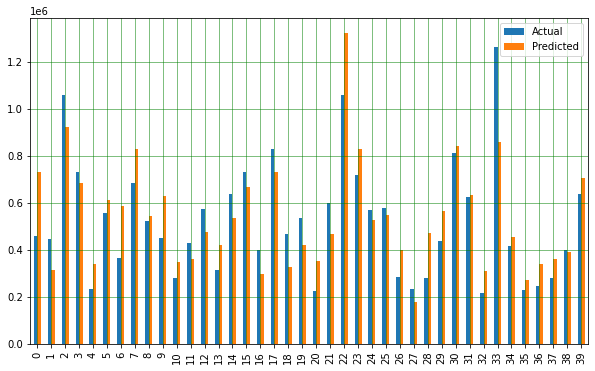

In [ ]:
df_temp = df_temp.head(40)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [ ]:
model.coef_

array([-43536.12215229,    176.26256429,  18211.88234107,  -3940.05015796,
        50155.60899583, 129540.08795656,  26579.30979203])

In [ ]:
## Verificando a previsão em um ponto de dados

X_new = np.array([3,120,5,2020,2,8,12]).reshape(1,-1)
model.predict(X_new)

array([362160.65804493])

In [ ]:
# Salvando modelo, isso irá gerar o arquivo .pkl


joblib.dump(model,"apartment_price_prediction.pkl")

['apartment_price_prediction.pkl']

3)Salvaria  o modelo em um arquivo utilizando o framework flask, para obter os campos do vetor x e prever.

Os aplicativos (móveis/web) devem ser desacoplados do treinamento/teste/ajuste do modelo. As ferramentas de implantação, como o docker, oferecem escalabilidade e facilidade de implantação ao seu aplicativo de aprendizado de máquina. Implaria outros algoritmos de aprendizado de máquina como SVM, KNN, árvore de decisão como aplicativos móveis da web altamente escaláveis.

---

---